In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,BooleanType,DateType,DecimalType,LongType
from pyspark.sql.functions import col,when,sum,avg,row_number
from pyspark.sql.window import Window


#creating spark session manually
spark=SparkSession.builder.appName("Ipl Data Analysis").getOrCreate()

In [0]:
sparkContext=spark.sparkContext

rdd1=sparkContext.parallelize([1,2,3,4,5,6,7,8,9])
rdd2=rdd1.map(lambda x:(x,1))

rdd2.collect()

Out[105]: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),    
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
     
ball_by_ball_df=spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv") 
ball_by_ball_df.show()

#filtering and getting only valid delivery
#ball_by_ball_df_new=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))
#ball_by_ball_df_new.show()


+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
he_schema = StructType([
    StructField("name", StringType(), False),
    StructField("language", StringType(), False),
    StructField("id", StringType(), False),
    StructField("bio", StringType(), False),
    StructField("version", StringType(), False)
])
df_js=spark.read.schema(he_schema).option("multiline",True).json("s3://public-evekon/json_data.json")
dt=df_js.na.drop("any")


#df_js.show()
#dt.count()
dt.show()

+-----------------+----------------+----------------+--------------------+-------+
|             name|        language|              id|                 bio|version|
+-----------------+----------------+----------------+--------------------+-------+
|    Adeel Solangi|          Sindhi|V59OF92YF627HFY0|Donec lobortis el...|    6.1|
|    Afzal Ghaffar|          Sindhi|ENTOCR13RSCLZ6KU|Aliquam sollicitu...|   1.88|
|    Aamir Solangi|          Sindhi|IAKPO3R4761JDRVG|Vestibulum pharet...|   7.27|
|    Abla Dilmurat|          Uyghur|5ZVOEPMJUI4MB4EN|Donec lobortis el...|   2.53|
|         Adil Eli|          Uyghur|6VTI8X6LL0MMPJCC|Vivamus id faucib...|   6.49|
|      Adile Qadir|          Uyghur|F2KEU5L7EHYSYFTT|Duis commodo orci...|    1.9|
|Abdukerim Ibrahim|          Uyghur|LO6DVTZLRK68528I|Vivamus id faucib...|    5.9|
|        Adil Abro|          Sindhi|LJRIULRNJFCNZJAJ|Etiam malesuada b...|   9.32|
| Afonso Vilarchán|        Galician|JMCL0CXNXHPL1GBC|Fusce eu ultrices...|   5.21|
|   

In [0]:
house_schema = StructType([
    StructField("price", LongType(), True),
    StructField("area", LongType(), True),
    StructField("bedrooms", LongType(), True),
    StructField("bathrooms", LongType(), True),
    StructField("stories", LongType(), True),
    StructField("mainroad", StringType(), True),
    StructField("guestroom", StringType(), True),  
    StructField("basement", StringType(), True),
    StructField("hotwaterheating", StringType(), True),  
    StructField("airconditioning", StringType(), True),
    StructField("parking", LongType(), True),
    StructField("prefarea", StringType(), True), 
    StructField("furnishingstatus", StringType(), True)
])


house_df=spark.read.schema(house_schema).format("parquet").option("inferschema","true").load("s3://public-evekon/House price.parquet") 
house_df.show()
house_df.write.partitionBy("furnishingstatus").mode("overwrite").parquet("/FileStore/tables/")

+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+
|   price| area|bedrooms|bathrooms|stories|mainroad|guestroom|basement|hotwaterheating|airconditioning|parking|prefarea|furnishingstatus|
+--------+-----+--------+---------+-------+--------+---------+--------+---------------+---------------+-------+--------+----------------+
|13300000| 7420|       4|        2|      3|     yes|       no|      no|             no|            yes|      2|     yes|       furnished|
|12250000| 8960|       4|        4|      4|     yes|       no|      no|             no|            yes|      3|      no|       furnished|
|12250000| 9960|       3|        2|      2|     yes|       no|     yes|             no|             no|      2|     yes|  semi-furnished|
|12215000| 7500|       4|        2|      2|     yes|       no|     yes|             no|            yes|      3|     yes|       furnished|
|11410000| 7420|       4|        1

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")
match_df.explain()


== Physical Plan ==
FileScan csv [match_sk#7231,match_id#7232,team1#7233,team2#7234,match_date#7235,season_year#7236,venue_name#7237,city_name#7238,country_name#7239,toss_winner#7240,match_winner#7241,toss_name#7242,win_type#7243,outcome_type#7244,manofmach#7245,win_margin#7246,country_id#7247] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[s3://ipl-data-analysis-project/Match.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<match_sk:int,match_id:int,team1:string,team2:string,match_date:date,season_year:int,venue_...




In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")


In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")


In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")



In [0]:
# Aggregating the total and average of match score in each match and inning >>\
    
total_and_avg_runs= ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
    )

In [0]:
#window function: Calculate running total of runs in each match for each over

windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") >= 6) | (col("runs_scored") >= 4)| (col("bowler_wicket") == True), True).otherwise(False)
)

     
#ball_by_ball_df.select(col("high_impact")).filter(col("high_impact")== True).show(5)        

new=ball_by_ball_df.filter(col("high_impact")== True).select(ball_by_ball_df.match_id,ball_by_ball_df.over_id,ball_by_ball_df.ball_id,ball_by_ball_df.run_out,col("lbw"))
new_d=new.where(new.lbw.isNotNull())
new_d.show()

+--------+-------+-------+-------+---+
|match_id|over_id|ball_id|run_out|lbw|
+--------+-------+-------+-------+---+
+--------+-------+-------+-------+---+



In [0]:
 
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:

from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:

from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# Show the enriched DataFrame
player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

#top scoring batsman per season
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       se marsh|       2008|       616|
|      g gambhir|       2008|       534|
|  st jayasuriya|       2008|       514|
|      sr watson|       2008|       468|
|       gc smith|       2008|       441|
|   ac gilchrist|       2008|       436|
|      yk pathan|       2008|       435|
|       sk raina|       2008|       421|
|       ms dhoni|       2008|       414|
|       v sehwag|       2008|       406|
|      rg sharma|       2008|       404|
|       r dravid|       2008|       371|
|     sc ganguly|       2008|       349|
|       s dhawan|       2008|       340|
|     rv uthappa|       2008|       320|
|  kc sangakkara|       2008|       320|
|      dj hussey|       2008|       319|
|    sa asnodkar|       2008|       311|
|       pa patel|       2008|       302|
|   yuvraj singh|       2008|       299|
|y venugopal rao|       2008|       288|
|      ja morkel

In [0]:
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       se marsh|       2008|       616|
|      g gambhir|       2008|       534|
|  st jayasuriya|       2008|       514|
|      sr watson|       2008|       468|
|       gc smith|       2008|       441|
|   ac gilchrist|       2008|       436|
|      yk pathan|       2008|       435|
|       sk raina|       2008|       421|
|       ms dhoni|       2008|       414|
|       v sehwag|       2008|       406|
|      rg sharma|       2008|       404|
|       r dravid|       2008|       371|
|     sc ganguly|       2008|       349|
|       s dhawan|       2008|       340|
|     rv uthappa|       2008|       320|
|  kc sangakkara|       2008|       320|
|      dj hussey|       2008|       319|
|    sa asnodkar|       2008|       311|
|       pa patel|       2008|       302|
|   yuvraj singh|       2008|       299|
|y venugopal rao|       2008|       288|
|      ja morkel

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()


+---------------+-------------------+-------------+
|    player_name|  avg_runs_per_ball|total_wickets|
+---------------+-------------------+-------------+
|     sm harwood| 0.3157894736842105|            0|
|        a zampa|0.42857142857142855|            0|
|     ankit soni|                0.5|            0|
|      gr napier|                0.5|            0|
|       aj finch|                0.5|            0|
|     avesh khan|                0.5|            0|
|       nb singh|               0.56|            0|
|     ag murtaza| 0.6455696202531646|            0|
|     fh edwards| 0.6585365853658537|            0|
|      sb bangar| 0.6666666666666666|            0|
|     d du preez| 0.6666666666666666|            0|
|        s gopal| 0.6666666666666666|            0|
|   kp pietersen|                0.7|            0|
|  la carseldine| 0.7142857142857143|            0|
|      ss mundhe| 0.7142857142857143|            0|
|       a kumble| 0.7614678899082569|            0|
|       umar

In [0]:

toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:

average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()


+---------------+-------------------+--------------+
|    player_name|   avg_runs_in_wins|innings_played|
+---------------+-------------------+--------------+
|smsm senanayake|                0.0|             1|
|     kp appanna|                0.0|             1|
|      jj bumrah|                0.0|             3|
|       i sharma|                0.0|             1|
|       ts mills|                0.0|             3|
|        a nehra|                0.0|             2|
|       j theron|                0.0|             2|
|       vr aaron|                0.0|             5|
|      sn thakur|                0.0|             2|
|  anirudh singh|                0.0|             1|
|     t thushara|                0.2|             5|
|      sa abbott|               0.25|             4|
|  yashpal singh|                0.3|            20|
|    s sreesanth| 0.3333333333333333|             3|
|    kc cariappa| 0.3333333333333333|             3|
|     jd unadkat|                0.4|         

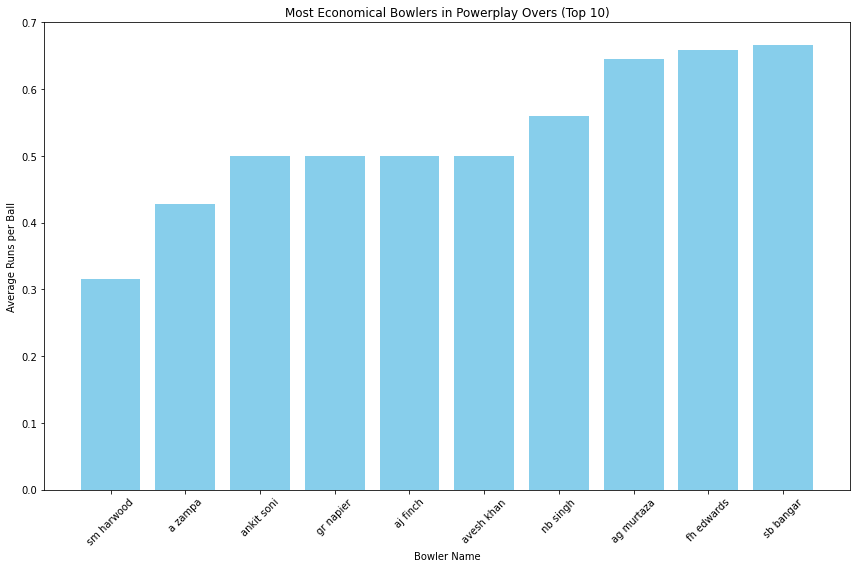

In [0]:
import matplotlib.pyplot as plt

economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     